In [72]:
import utils
from darts import TimeSeries
import numpy as np
import pandas as pd
from darts.metrics import rmse
from darts.models import NaiveSeasonal

In [73]:
df = utils.load_data()

df.head()

,US_CPI,US_CPI_EXCL_FOOD_N_ENERGY,US_PERSONAL_SPENDING_PCE,CANADA_CPI,CANADA_CPI_EXCL_FOOD_N_ENERGY,US_CPI_MOM,US_CPI_QOQ,US_CPI_YOY,US_CPI_EXCL_FOOD_N_ENERGY_MOM,US_CPI_EXCL_FOOD_N_ENERGY_QOQ,...,US_VIX_INDEX_QOQ,US_VIX_INDEX_YOY,DXY_INDEX_WOW,DXY_INDEX_MOM,DXY_INDEX_QOQ,DXY_INDEX_YOY,SKEW_INDEX_WOW,SKEW_INDEX_MOM,SKEW_INDEX_QOQ,SKEW_INDEX_YOY
DATE,,,,,,,,,,,,,,,,,,,,,
1962-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:

# Create a TimeSeries object
ts = TimeSeries.from_dataframe(df, value_cols=['US_TB_YIELD_10YRS']) #.add_holidays("US")


log_diffed = ts.map(np.log1p).diff()

In [75]:
ts.gaps()

,gap_start,gap_end,gap_size
0,1962-02-12,1962-02-12,1
1,1962-02-22,1962-02-22,1
2,1962-04-20,1962-04-20,1
3,1962-05-30,1962-05-30,1
4,1962-07-04,1962-07-04,1
...,...,...,...
675,2024-02-19,2024-02-19,1
676,2024-03-29,2024-03-29,1
677,2024-05-27,2024-05-27,1
678,2024-06-19,2024-06-19,1


<Axes: xlabel='DATE'>

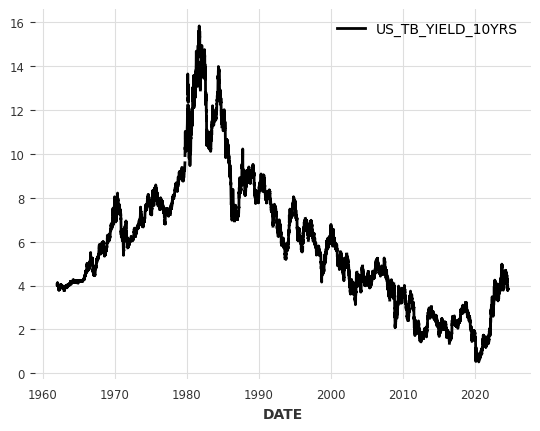

In [76]:
ts.plot()

<Axes: xlabel='DATE'>

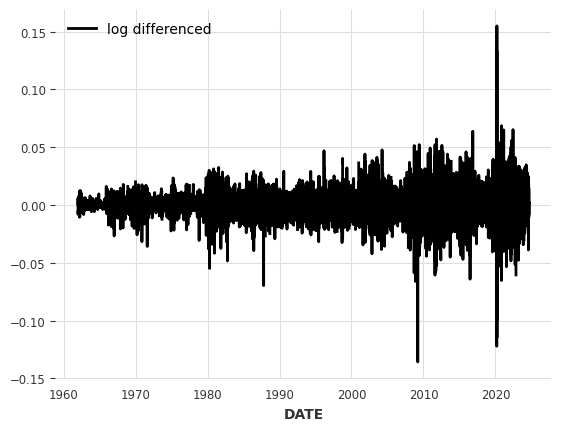

In [77]:
log_diffed["US_TB_YIELD_10YRS"].plot(label='log differenced')


# Naive Models

In [78]:
# ts.drop_before(pd.Timestamp('2024-01-01')).plot(label='actual')
# model.predict(n=10).plot(label='Seasonal forecast')


# Naive Model

  0%|          | 0/433 [00:00<?, ?it/s]

rmse = 0.07


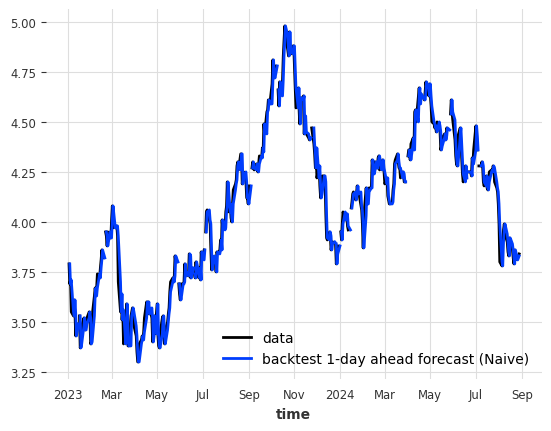

In [80]:
from darts.metrics import rmse

# Create a Naive Seasonal model
model = NaiveSeasonal(K=1)
model.fit(ts)


hfc_params = {
    "series": ts,
    "start": pd.Timestamp("2023-01-01"),  # can also be a float for the fraction of the series to start at
    "forecast_horizon": 1,
    "verbose": True,
}
historical_fcast_theta = model.historical_forecasts(last_points_only=True, **hfc_params)

ts.drop_before(pd.Timestamp("2023-01-01")).plot(label="data")
historical_fcast_theta.plot(label="backtest 1-day ahead forecast (Naive)")
print(f"rmse = {rmse(ts, historical_fcast_theta):.2f}")



# 

In [ ]:
t